## Telecom churn case study
This solution is divided into 5 parts which are following:

- Data visualization
- Filter high value customers
- Derive new features
- Churn and other important features
- Identifying important predictor attributes


## Data visualization

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
#Load telcom churn data and look at top 5 rows of data set
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_data.shape

(99999, 226)

In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
#Load data dictionary and understand the meaning of columns in dataset
data_dictionary = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
print(data_dictionary)

     Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network 

### Filter High Value Customers

High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of 
the average recharge amount in the first two months (the good phase).

Let's derive features to extract high value customers.
Let's find out total amount spent by customers on data recharge,we have two colums available to find this out 
- first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8).
- second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8).

Let's introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x

In [7]:
telecom_data['total_rech_data_amt_6'] = telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_data_amt_7'] = telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']
telecom_data['total_rech_data_amt_8'] = telecom_data['av_rech_amt_data_8'] * telecom_data['total_rech_data_8']
telecom_data['total_rech_data_amt_9'] = telecom_data['av_rech_amt_data_9'] * telecom_data['total_rech_data_9']

Let's find out the average recharge done in the first two months (june & july) - the good phase
Total amount spend would be the sum of total data recharge done & total call/sms recharges

In [8]:
telecom_recharge_goodphase = (telecom_data['total_rech_amt_6'].fillna(0) 
+ telecom_data['total_rech_amt_7'].fillna(0) 
+ telecom_data['total_rech_data_amt_6'].fillna(0) 
+ telecom_data['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
percentile_70_goodphase = np.percentile(telecom_recharge_goodphase, 70.0)
print("70 percentile is : ", percentile_70_goodphase)

70 percentile is :  478.0


In [9]:
# filter the given data set based on 70th percentile and create a new dataset for high value customers
telecom_highvalue_customer = telecom_data[telecom_recharge_goodphase >= percentile_70_goodphase]

print("Dimensions of the high value customer dataset:",telecom_highvalue_customer.shape)

Dimensions of the high value customer dataset: (30001, 230)


#### Let's introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn).
#### We will calculate churn/non-churn based on the usage as mentioned in the problem statement i.e. total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 should be 0.

In [10]:
telecom_highvalue_customer['churn'] = np.where(telecom_highvalue_customer[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_highvalue_customer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0,0


In [11]:
# lets find out churn/non churn percentage
telecom_highvalue_customer['churn'].value_counts()/len(telecom_highvalue_customer)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [12]:
# now we dont need columns av_rech_amt_data_x,total_rech_data_x for 6th, 7th and 8th months, let's drop them
telecom_highvalue_customer.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

telecom_highvalue_customer.shape

(30001, 223)

In [13]:
# lets check the columns having only 1 unique value and drop such columns
for i in telecom_highvalue_customer.columns:
    if telecom_highvalue_customer[i].nunique() == 1:
        print("Dropping the column",i)
        telecom_highvalue_customer.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",telecom_highvalue_customer.shape)

Dropping the column circle_id
Dropping the column loc_og_t2o_mou
Dropping the column std_og_t2o_mou
Dropping the column loc_ic_t2o_mou
Dropping the column last_date_of_month_6
Dropping the column last_date_of_month_7
Dropping the column last_date_of_month_8
Dropping the column last_date_of_month_9
Dropping the column std_og_t2c_mou_6
Dropping the column std_og_t2c_mou_7
Dropping the column std_og_t2c_mou_8
Dropping the column std_og_t2c_mou_9
Dropping the column std_ic_t2o_mou_6
Dropping the column std_ic_t2o_mou_7
Dropping the column std_ic_t2o_mou_8
Dropping the column std_ic_t2o_mou_9

Dimension of the updated dataset: (30001, 207)


In [14]:
# Drop Columns with > 30% of missing values except 9th Month's columns
columns = telecom_highvalue_customer.columns
telecom_null_perc = telecom_highvalue_customer.isnull().sum() * 100 / len(telecom_highvalue_customer)
telecom_null_df = pd.DataFrame({'col_name': columns,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns to be dropped:",drop_cols)

# lets drop these columns
telecom_highvalue_customer.drop(drop_cols, axis=1,inplace = True)
telecom_highvalue_customer.shape

list of columns to be dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_

(30001, 180)

In [15]:
# lets check for non numerical columns that can be changed to integers, floats or date types
object_col_data = telecom_highvalue_customer.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


observation : all the columns below can be converted to date type

In [16]:
# convert to datetime
for col in object_col_data.columns:
    telecom_highvalue_customer[col] = pd.to_datetime(telecom_highvalue_customer[col])

telecom_highvalue_customer.shape

(30001, 180)

In [17]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = telecom_highvalue_customer.corr()
cor

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_9,churn
mobile_number,1.000000,0.033944,0.029496,0.034570,0.039195,0.008389,0.003247,0.004858,0.004205,0.019866,...,-0.009693,-0.014323,-0.031632,0.315694,-0.032058,-0.028015,-0.037881,-0.007521,-0.011201,-0.030100
arpu_6,0.033944,1.000000,0.671732,0.612617,0.564801,0.339552,0.221413,0.197928,0.192811,0.507166,...,-0.017509,-0.017483,-0.075534,0.041451,0.058547,0.055172,0.112462,0.045053,0.076456,0.067624
arpu_7,0.029496,0.671732,1.000000,0.759858,0.683613,0.212484,0.317217,0.266236,0.234469,0.354724,...,0.000907,-0.005051,-0.070203,0.031506,0.083801,0.102527,0.055324,0.059261,0.095895,-0.012789
arpu_8,0.034570,0.612617,0.759858,1.000000,0.797102,0.150846,0.230248,0.337872,0.275398,0.279629,...,0.045430,0.036180,-0.047713,0.070789,0.146710,0.085501,0.073855,0.104992,0.138595,-0.160911
arpu_9,0.039195,0.564801,0.683613,0.797102,1.000000,0.123204,0.170916,0.249084,0.335219,0.249739,...,0.029751,0.057945,-0.009440,0.087142,0.126515,0.085711,0.080679,0.153409,0.199730,-0.249097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,-0.028015,0.055172,0.102527,0.085501,0.085711,-0.112100,-0.109663,-0.092710,-0.091963,-0.103274,...,0.049845,0.047005,0.172452,0.023823,0.697279,1.000000,0.667316,0.149139,0.118323,-0.055555
jun_vbc_3g,-0.037881,0.112462,0.055324,0.073855,0.080679,-0.102942,-0.107852,-0.085046,-0.081678,-0.087686,...,0.046155,0.053792,0.160426,0.017251,0.577860,0.667316,1.000000,0.138163,0.110542,-0.031014
sep_vbc_3g,-0.007521,0.045053,0.059261,0.104992,0.153409,-0.034351,-0.034045,-0.029260,-0.021904,-0.019681,...,0.052337,0.070103,0.069741,0.012169,0.193733,0.149139,0.138163,1.000000,0.124699,-0.043793
total_rech_data_amt_9,-0.011201,0.076456,0.095895,0.138595,0.199730,-0.028831,-0.025909,-0.024361,-0.017198,-0.031070,...,0.403082,0.571715,0.095343,-0.044558,0.134311,0.118323,0.110542,0.124699,1.000000,-0.015852


In [18]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_highvalue_customer.drop(drop_col_list, axis=1, inplace=True)
telecom_highvalue_customer.shape

(30001, 125)

In [19]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in telecom_highvalue_customer.columns if '_9' in col]

telecom_highvalue_customer.drop(cols_to_drop, axis=1, inplace=True)

telecom_highvalue_customer.shape

(30001, 88)

In [20]:
#Let's check for null values in rows
(telecom_highvalue_customer.isnull().sum() * 100 / len(telecom_highvalue_customer)).sort_values(ascending = False)

std_og_mou_8        3.913203
std_ic_t2f_mou_8    3.913203
ic_others_8         3.913203
loc_og_mou_8        3.913203
isd_ic_mou_8        3.913203
                      ...   
max_rech_amt_7      0.000000
max_rech_amt_6      0.000000
total_rech_num_8    0.000000
total_rech_num_7    0.000000
mobile_number       0.000000
Length: 88, dtype: float64

In [21]:
# drop rows with null values
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['onnet_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['onnet_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['onnet_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['offnet_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['offnet_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['offnet_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_ic_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_ic_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_ic_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_og_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_og_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['roam_og_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_t2c_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_t2c_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_t2c_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_og_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_t2f_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_t2f_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_t2f_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_og_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_og_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_og_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_og_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_og_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_og_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_og_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['og_others_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['og_others_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['og_others_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_ic_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_ic_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['loc_ic_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2t_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2t_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2t_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2f_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2f_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_t2f_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['std_ic_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_ic_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_ic_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['spl_ic_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_ic_mou_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_ic_mou_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['isd_ic_mou_8'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['ic_others_6'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['ic_others_7'])]
telecom_highvalue_customer = telecom_highvalue_customer[~np.isnan(telecom_highvalue_customer['ic_others_8'])]

In [22]:
telecom_highvalue_customer.shape

(28504, 88)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [25]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [26]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

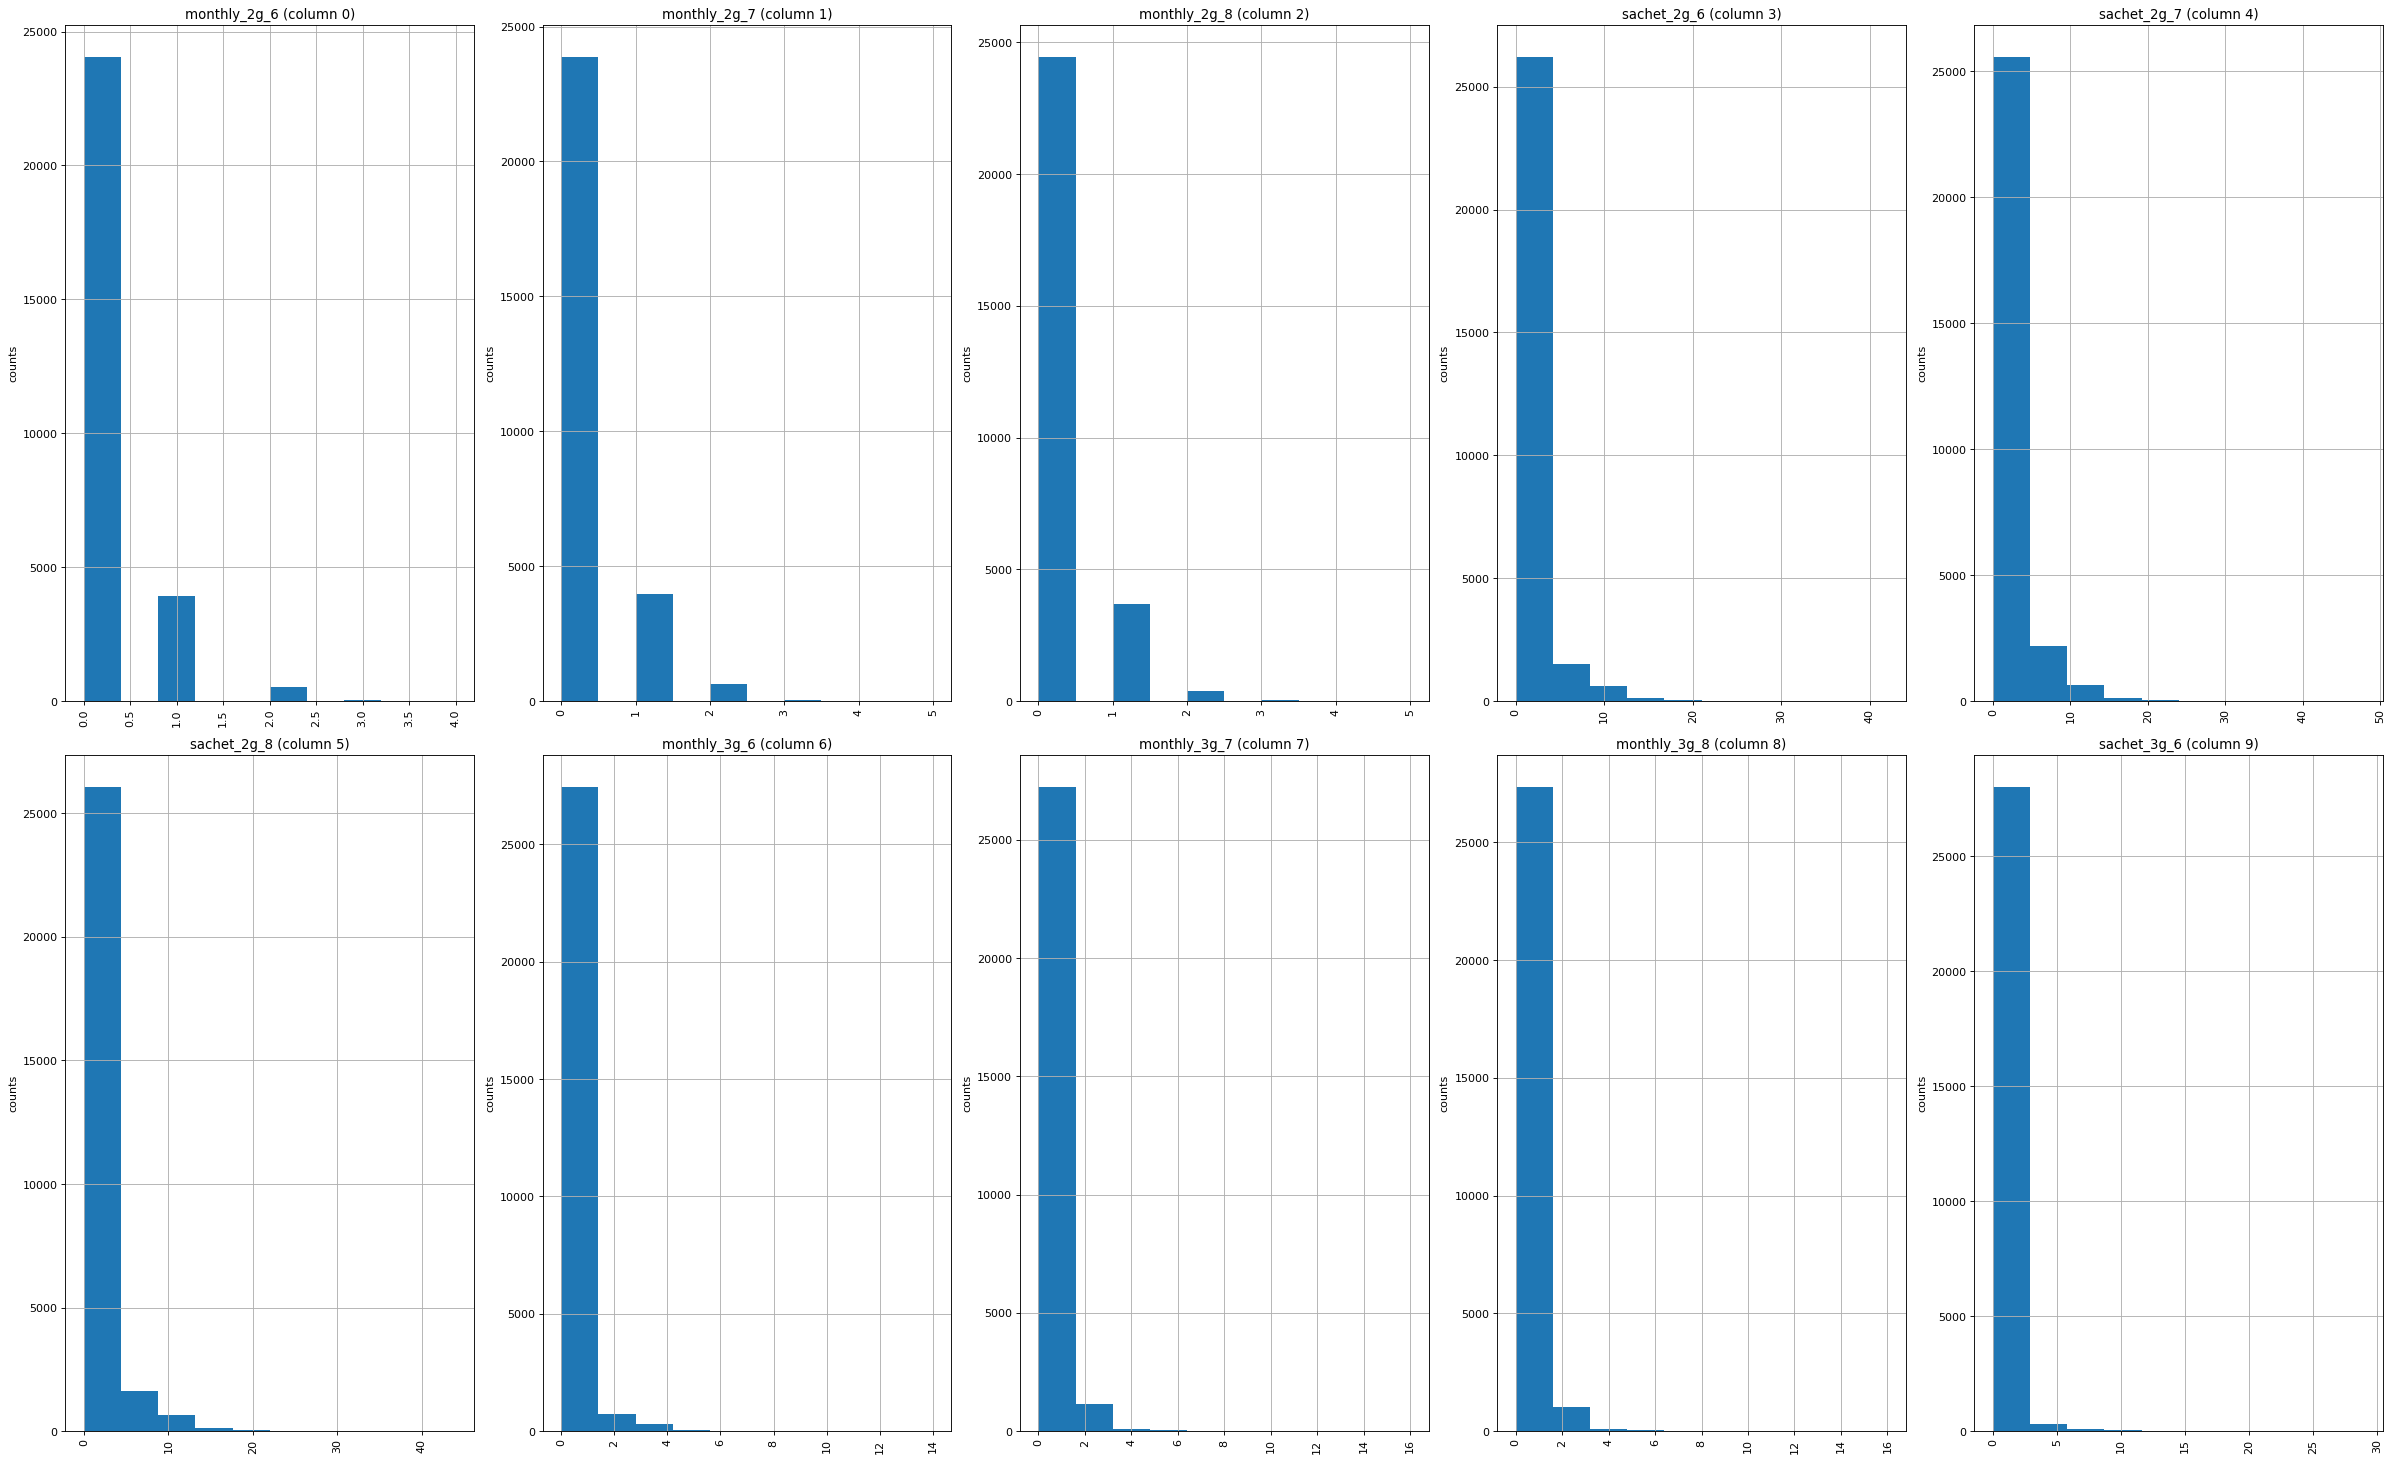

In [27]:
# call the function to plot the graphs
plotPerColumnDistribution(telecom_highvalue_customer, 10, 5)

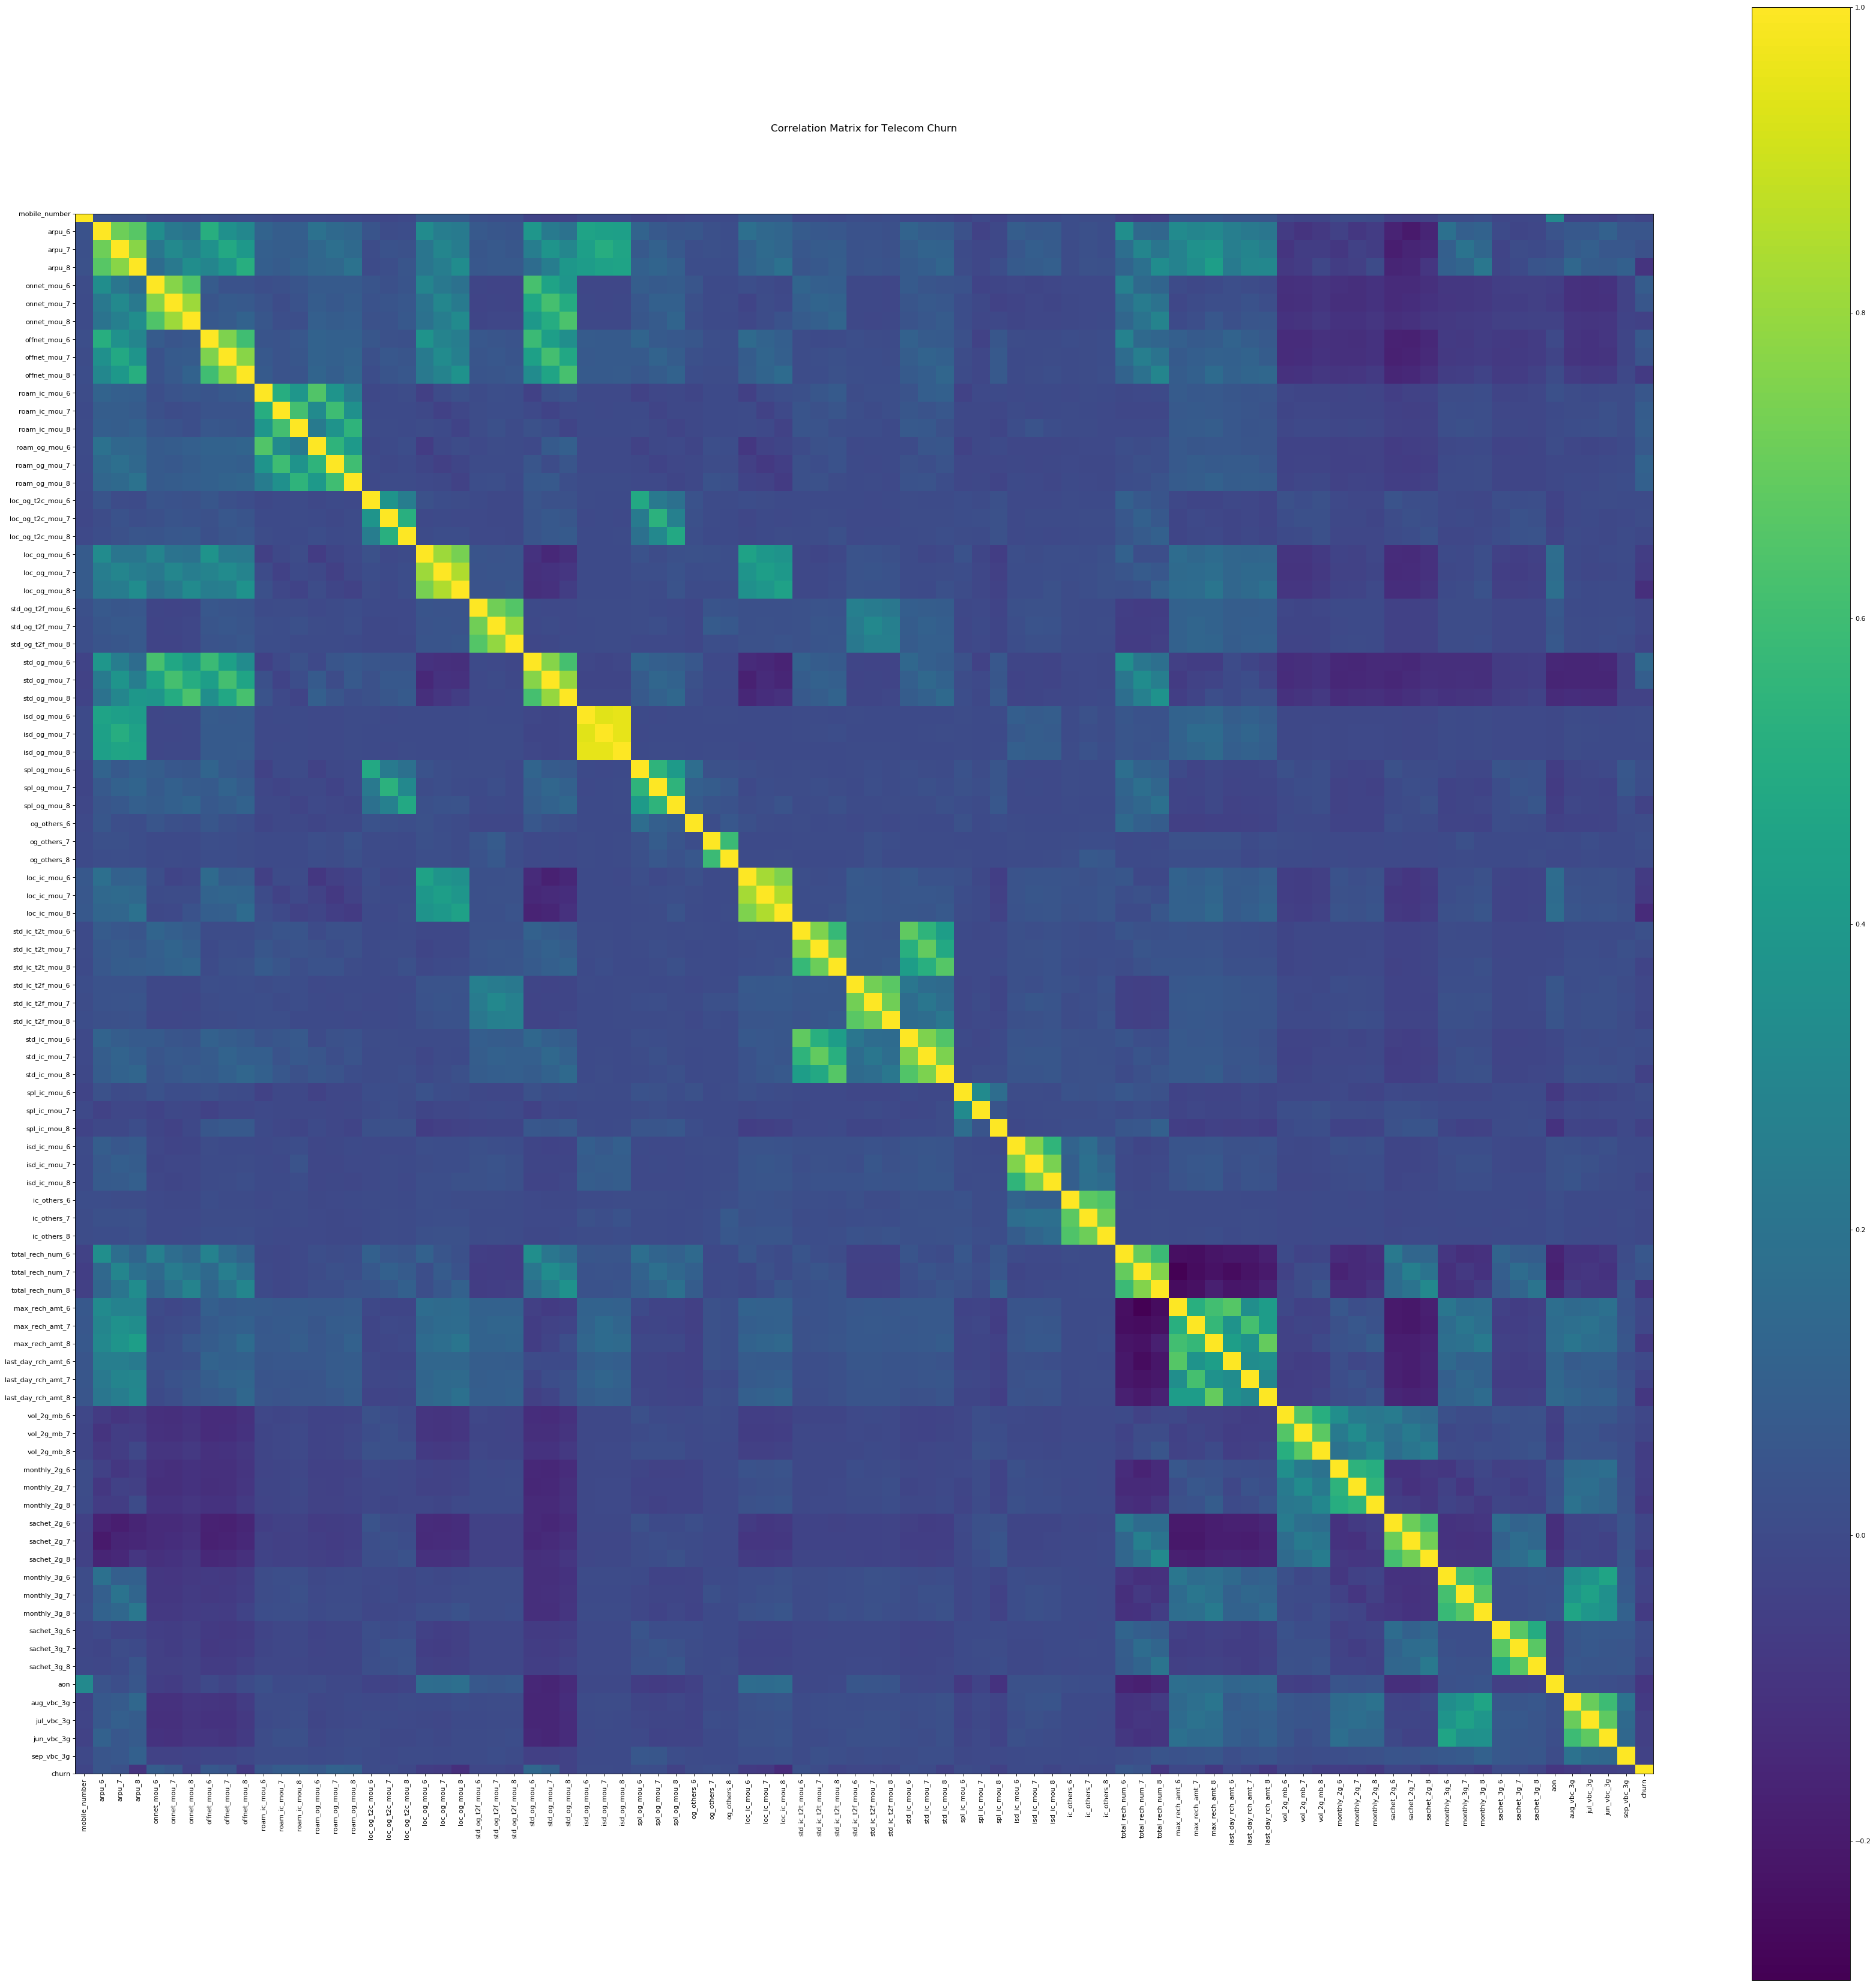

In [28]:
plotCorrelationMatrix(telecom_highvalue_customer, 53)

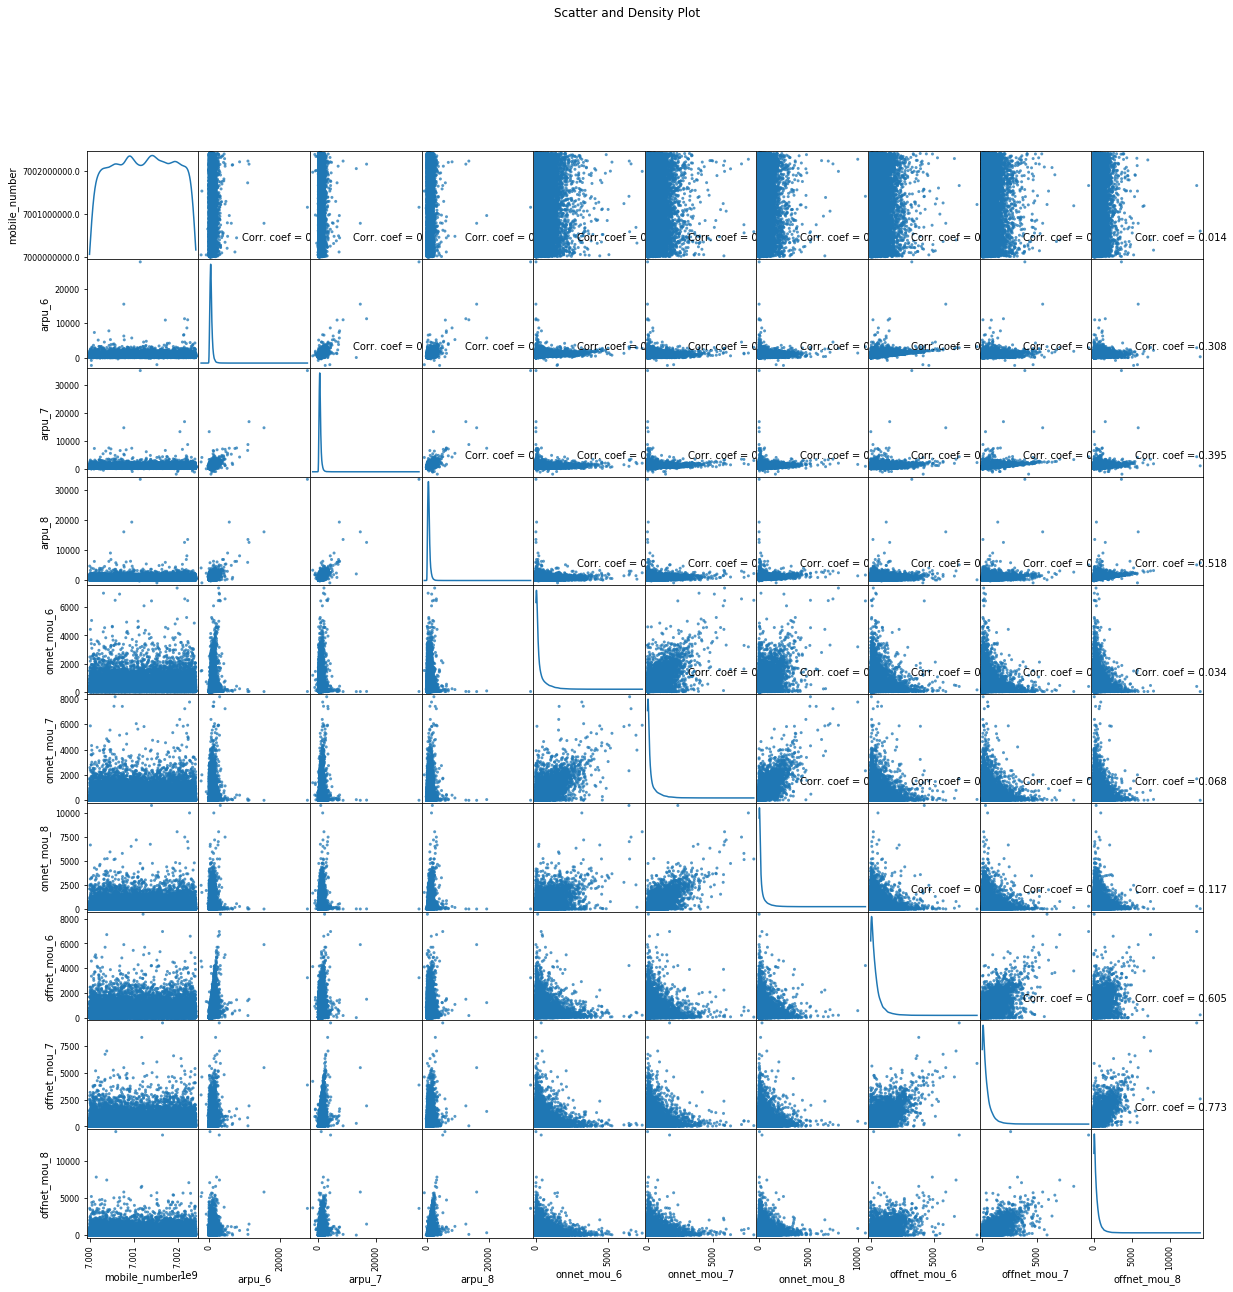

In [29]:
plotScatterMatrix(telecom_highvalue_customer, 20, 10)

## Derive some new feautres from the existing columns

In [30]:
# lets first create list of columns belonging to 6th and 7th months
col_list = telecom_highvalue_customer.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (telecom_highvalue_customer.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_highvalue_customer[avg_col_name] = (telecom_highvalue_customer[col_6]  + telecom_highvalue_customer[col_7])/ 2

(28504, 88)


In [31]:
# we dont need columns from which we have derived new features, we will drop those columns
print ("dimension of the updated dataset after creating dervied features:",telecom_highvalue_customer.shape)
col_to_drop = telecom_highvalue_customer.filter(regex='_6|_7').columns
telecom_highvalue_customer.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",telecom_highvalue_customer.shape)

dimension of the updated dataset after creating dervied features: (28504, 115)
dimension of the dataset after dropping un-necessary columns: (28504, 61)


In [32]:
# lets now conevrt AON in months
telecom_highvalue_customer['aon_mon'] = telecom_highvalue_customer['aon']/30
telecom_highvalue_customer.drop('aon', axis=1, inplace=True)
telecom_highvalue_customer['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

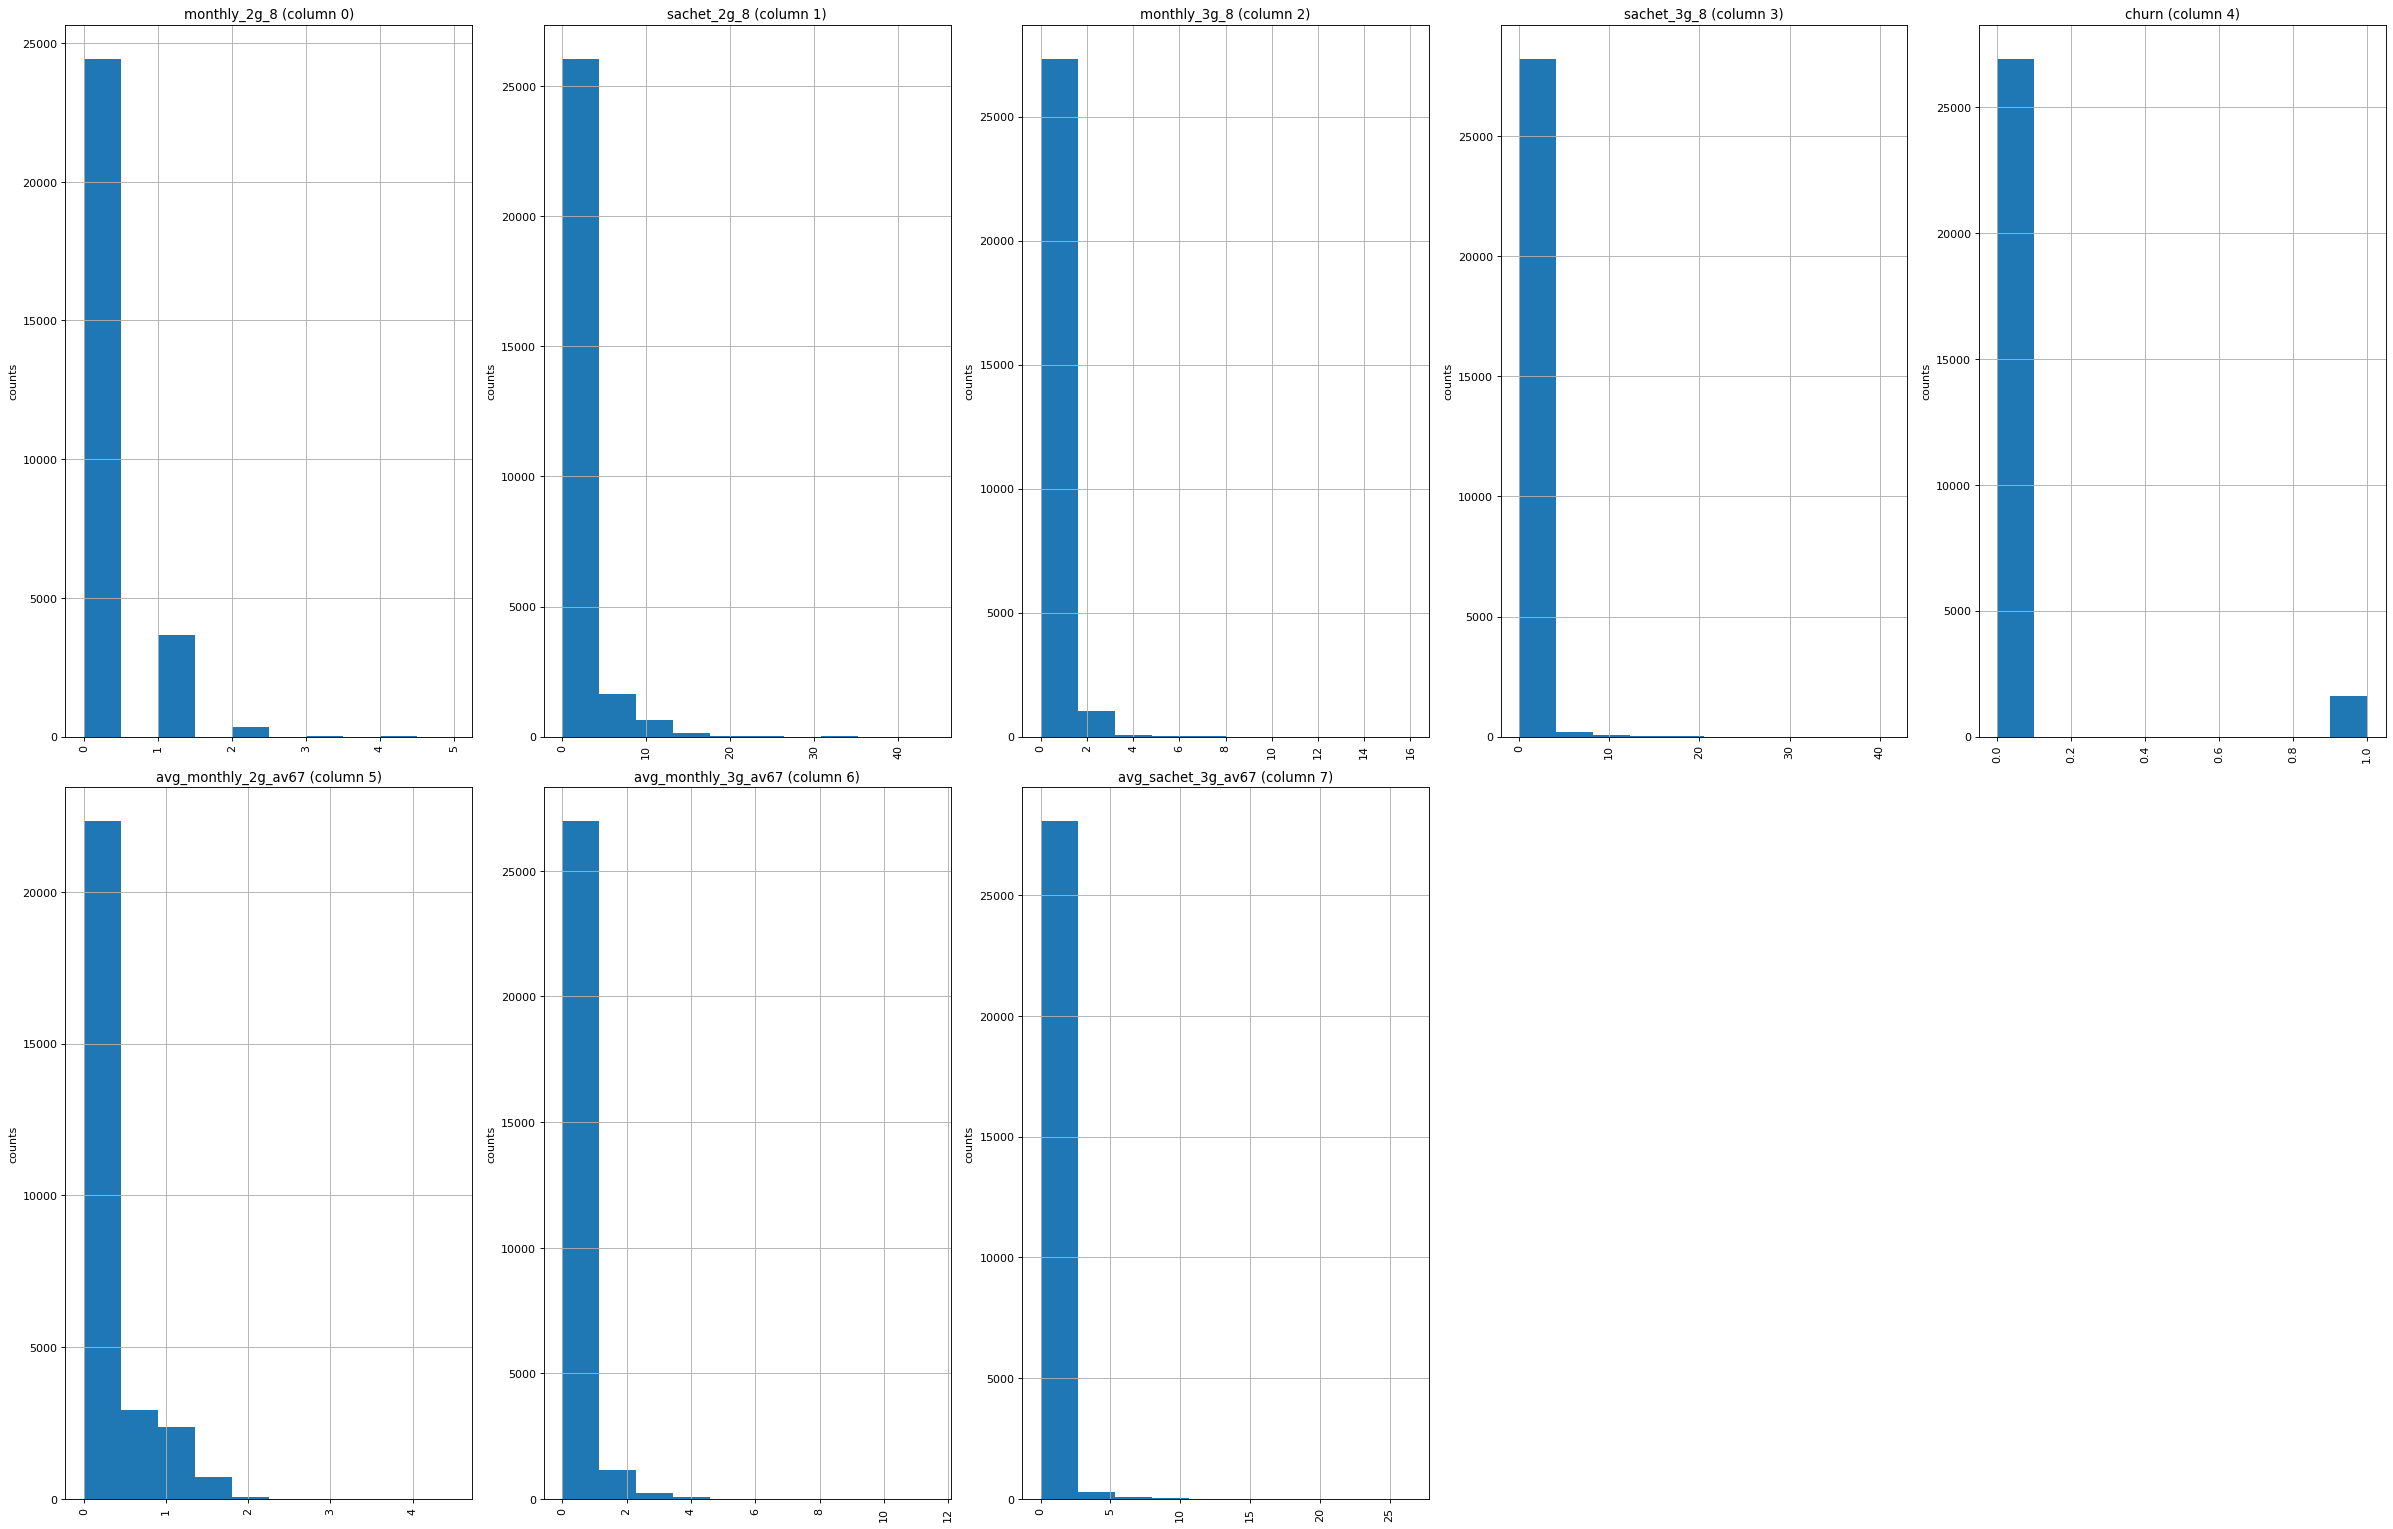

In [33]:
# lets again draw the plots with the updated dataset
plotPerColumnDistribution(telecom_highvalue_customer, 10, 5)

Text(0.5, 1.0, 'Tenure Graph')

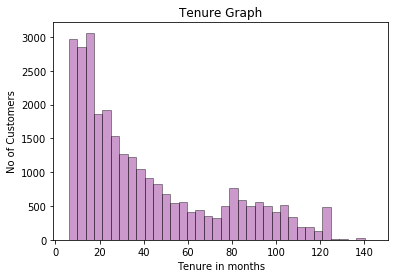

In [34]:
ax = sns.distplot(telecom_highvalue_customer['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')

In [35]:
#Create labels for tenure range
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_highvalue_customer['tenure_range'] = pd.cut(telecom_highvalue_customer['aon_mon'], tn_range, labels=tn_label)
telecom_highvalue_customer['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

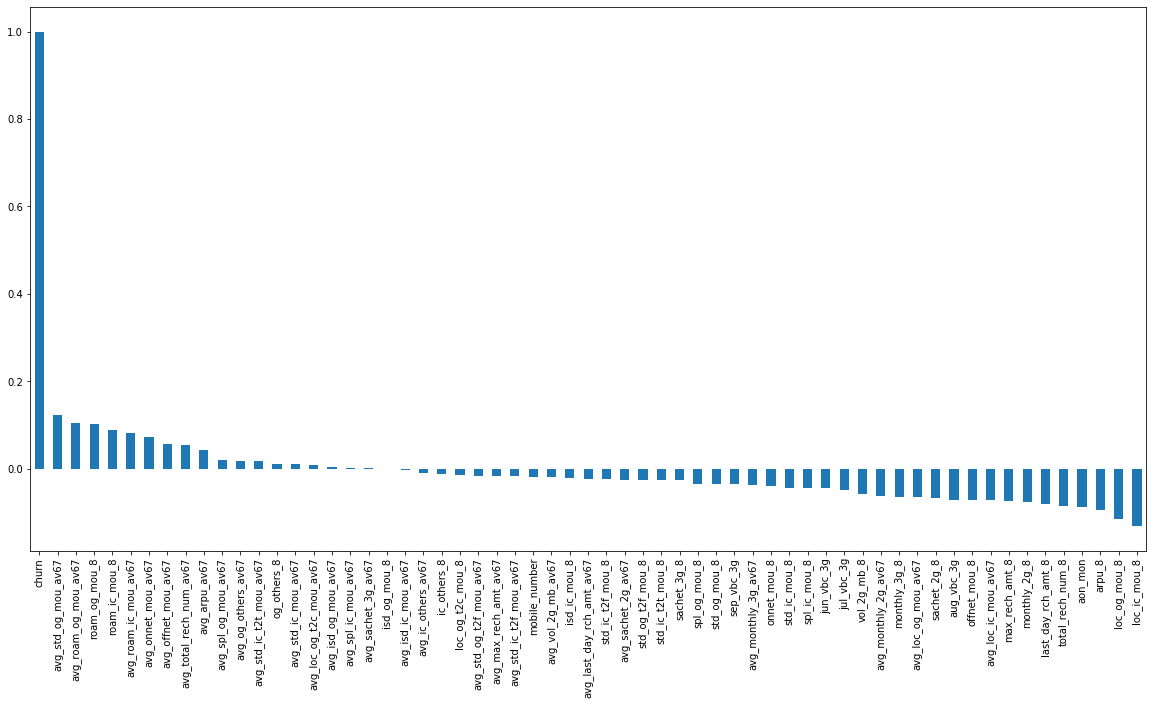

In [36]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
telecom_highvalue_customer.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

observations : 
1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

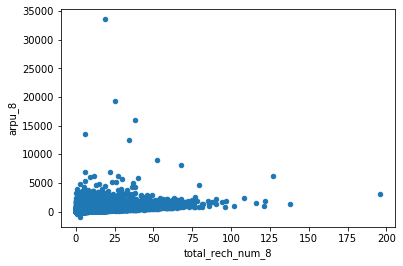

In [37]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_highvalue_customer[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')

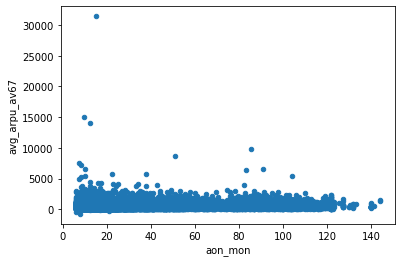

In [38]:
# plot between tenure and revenue
telecom_highvalue_customer[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon', y='avg_arpu_av67')

### Churn Vs other important features

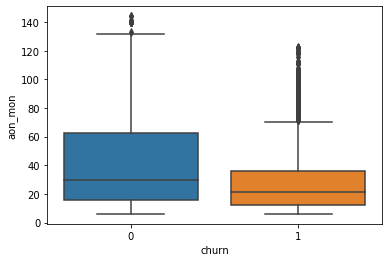

In [39]:
sns.boxplot(x = telecom_highvalue_customer.churn, y = telecom_highvalue_customer.aon_mon)

Text(0.5, 1.0, 'Churn Vs Base Cost')

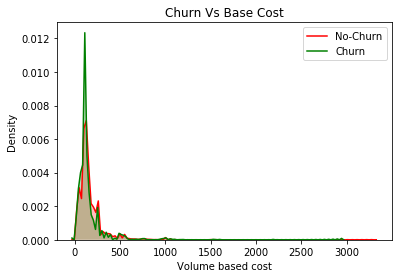

In [40]:
# churn Vs Base Cost
ax = sns.kdeplot(telecom_highvalue_customer.avg_max_rech_amt_av67[(telecom_highvalue_customer["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_highvalue_customer.avg_max_rech_amt_av67[(telecom_highvalue_customer["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

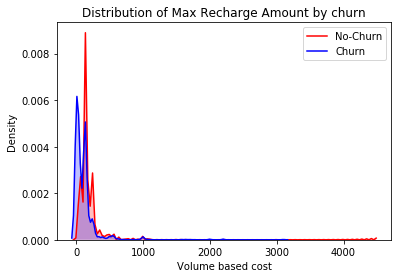

In [41]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_highvalue_customer.max_rech_amt_8[(telecom_highvalue_customer["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_highvalue_customer.max_rech_amt_8[(telecom_highvalue_customer["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

In [43]:
# Let's create a new dataset for model building
df = telecom_highvalue_customer[:].copy()

# lets drop tenure range because it is highly correlated with AON MONTH column
# let's also drop mobile number since it's of no use for this analysis
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,...,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


In [44]:
# lets create X & y dataset for model building
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [45]:
# let's split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19952, 59)
Dimension of X_test: (8552, 59)


### Model building using Logistic regression

In [48]:
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Logistic regression model
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
X_test = scaler.transform(X_test)
logsk1.predict(X_test)
logsk1.predict_proba(X_test)
logsk1.score(X_test, y_test)

0.9443405051449953

We got accuracy of approx 94% using logistic regression model built on all features. 
Let's use RFE for features reduction and rebuild the model.

In [50]:
# using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# let's select 15 most important features from rfe
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [51]:
rfe_features = list(df.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['arpu_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'aon_mon']


In [52]:
# Now will validate the model with features selected by RFE.
X = df[rfe_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
scaler = preprocessing.StandardScaler().fit_transform(X_train)

In [53]:
# Logistic regression model
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(X_train, y_train)
logsk1.predict(X_test)
logsk1.predict_proba(X_test)
logsk1.score(X_test, y_test)

0.9448082319925164

As predction score is almost same i.e. 0.94 with features selected through RFE, Hence we should use model built with features selected by RFE. Below are the 15 most important features:

- arpu_8
- loc_og_mou_8
- loc_ic_mou_8
- std_ic_mou_8
- spl_ic_mou_8
- total_rech_num_8
- last_day_rch_amt_8
- vol_2g_mb_8
- monthly_2g_8
- sachet_2g_8
- monthly_3g_8
- sep_vbc_3g
- avg_arpu_av67
- avg_loc_ic_mou_av67
- aon_mon

## Model building using PCA

In [56]:
# PCA
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [59]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on data
#pca.fit(X)

In [60]:
X_tr_pca = pca.fit_transform(X_train)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(19952, 59)
(8552, 59)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_train)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[6647 1428]
 [ 125  352]]
Accuracy of the logistic regression model with PCA:  0.8184050514499532


In [63]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.301378,0.403189,-0.010120,arpu_8
1,0.282486,-0.075653,0.066595,onnet_mou_8
2,0.334959,0.168427,-0.136614,offnet_mou_8
3,0.003188,0.006932,0.001662,roam_ic_mou_8
4,0.011635,0.009681,0.001451,roam_og_mou_8
5,0.000536,-0.000041,0.000199,loc_og_t2c_mou_8
6,0.092070,0.276887,-0.307284,loc_og_mou_8
7,0.000340,0.001369,-0.000551,std_og_t2f_mou_8
8,0.504991,-0.212527,0.238673,std_og_mou_8
9,0.007035,0.019450,-0.003233,isd_og_mou_8


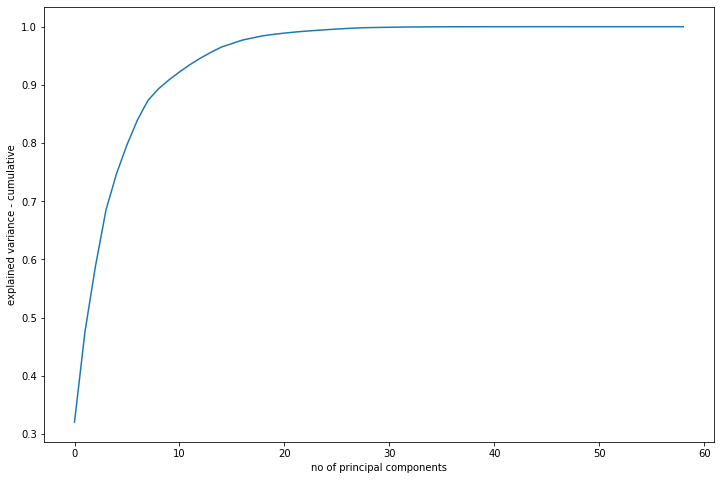

In [64]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [65]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 14 columns explains 95.6% of the variance, lets apply PCA with 14 components

array([ 32.05,  47.62,  58.88,  68.5 ,  74.72,  79.7 ,  83.98,  87.33,
        89.32,  90.85,  92.22,  93.48,  94.6 ,  95.6 ,  96.51,  97.11,
        97.71,  98.1 ,  98.47,  98.71,  98.92,  99.1 ,  99.25,  99.38,
        99.5 ,  99.61,  99.72,  99.8 ,  99.86,  99.89,  99.92,  99.95,
        99.97,  99.99, 100.  , 100.01, 100.02, 100.02, 100.02, 100.02,
       100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02,
       100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02,
       100.02, 100.02, 100.02])

In [66]:
# PCA with 14 components
pca_14 = PCA(n_components=14)

df_tr_pca_14 = pca_14.fit_transform(X_train)
print(df_tr_pca_14.shape)

df_test_pca_14 = pca_14.transform(X_test)
print(df_test_pca_14.shape)

(19952, 14)
(8552, 14)


In [67]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_14, y_train)

# Predicted probabilities
y_pred14 = lr_pca1.predict(df_test_pca_14)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred14)

print("Accuracy with 14 PCAs: ",accuracy_score(y_test,y_pred14))

Accuracy with 14 PCAs:  0.9446913002806361


In [68]:
print(confusion_matrix(y_test,y_pred14))

[[8047   28]
 [ 445   32]]


Conclusions from the above model:

14 features can explain 95.6% variance in the dataset and model built using these 14 features has 94% accuracy so we are good with this model. Below are the most important 5 features:


- arpu_8
- onnet_mou_8
- offnet_mou_8
- roam_ic_mou_8
- roam_og_mou_8

# Decision Tree

In [70]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [72]:
# feature selection using linear SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
svc_model = SelectFromModel(svc, prefit=True)
X_svc = svc_model.transform(X_train)
position = svc_model.get_support(indices=True)

print(X_svc.shape)
print(position)

(19952, 41)
[ 1  2  3  4  6  8  9 10 11 12 13 15 17 19 20 21 22 24 27 28 29 30 31 32
 33 34 35 39 40 41 43 44 46 48 49 50 51 52 53 55 58]


In [73]:
# feature vector for decision tree
svc_features = list(df.columns[position])
print("SVC Features: ", svc_features)

SVC Features:  ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'sachet_2g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_isd_og_mou_av67', 'avg_spl_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67', 'avg_std_ic_mou_av67', 'avg_isd_ic_mou_av67', 'avg_ic_others_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_last_day_rch_amt_av67', 'avg_vol_2g_mb_av67', 'avg_sachet_2g_av67', 'aon_mon']


In [75]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_svc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8075
           1       0.64      0.25      0.35       477

    accuracy                           0.95      8552
   macro avg       0.80      0.62      0.66      8552
weighted avg       0.94      0.95      0.94      8552



In [77]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))

# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[8009   66]
 [ 360  117]]
Decision Tree - Accuracy : 0.9501870907390084


### Lets fine tune hyperparameters¶


In [79]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_svc, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [81]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.322934,0.010216,0.006989,0.000958,1,{'max_depth': 1},0.943874,0.943874,0.943874,0.943860,...,0.943915,0.000091,5,0.943926,0.943926,0.943926,0.943929,0.943870,0.943915,0.000023
1,0.590799,0.087247,0.007126,0.002003,2,{'max_depth': 2},0.947131,0.941869,0.947883,0.946366,...,0.947173,0.003434,3,0.947560,0.948750,0.947309,0.947626,0.946188,0.947486,0.000817
2,0.844440,0.048674,0.008324,0.002372,3,{'max_depth': 3},0.948384,0.942120,0.947883,0.946867,...,0.947574,0.003360,1,0.948374,0.949753,0.948687,0.948440,0.947253,0.948501,0.000797
3,1.262531,0.304379,0.007319,0.002019,4,{'max_depth': 4},0.948634,0.941368,0.949136,0.946617,...,0.947524,0.003505,2,0.948938,0.950755,0.950128,0.949505,0.948130,0.949491,0.000912
4,2.343850,0.478687,0.012471,0.004724,5,{'max_depth': 5},0.947883,0.942120,0.944876,0.943108,...,0.946020,0.003624,4,0.949377,0.952572,0.952885,0.951760,0.949446,0.951208,0.001513


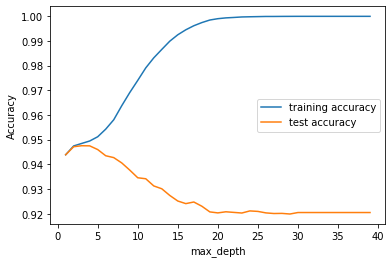

In [82]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_depth = 10 seems to be the optimal one

In [84]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_svc, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [85]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.734616,0.226236,0.002601,0.001355,5,{'min_samples_leaf': 5},0.928339,0.934352,0.934352,0.930326,...,0.932187,0.002431,10,0.974500,0.973122,0.974312,0.973562,0.973125,0.973724,0.000582
1,0.569611,0.038406,0.001392,0.000494,25,{'min_samples_leaf': 25},0.945127,0.941118,0.944375,0.942105,...,0.943865,0.002000,9,0.954389,0.955705,0.955391,0.955833,0.954645,0.955192,0.000576
2,0.424010,0.076186,0.001599,0.000490,45,{'min_samples_leaf': 45},0.946630,0.944375,0.946880,0.945363,...,0.945770,0.000907,7,0.952071,0.952697,0.952760,0.952700,0.951576,0.952361,0.000467
3,0.622311,0.254661,0.001802,0.000745,65,{'min_samples_leaf': 65},0.947632,0.943373,0.948133,0.947368,...,0.947123,0.001967,3,0.951194,0.951319,0.950567,0.951698,0.950824,0.951120,0.000393
4,0.883812,0.286685,0.003798,0.002315,85,{'min_samples_leaf': 85},0.945878,0.944375,0.947632,0.943108,...,0.945569,0.001642,8,0.950442,0.951131,0.949189,0.950382,0.950636,0.950356,0.000640


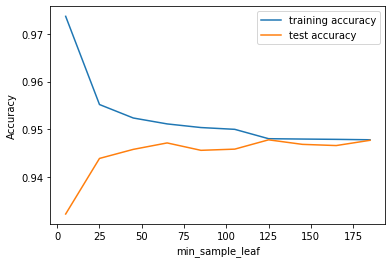

In [86]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_leaf =25 seems to be the optimal one.

In [87]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_svc, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [88]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.994281,0.167409,0.008011,0.001667,5,{'min_samples_split': 5},0.915059,0.921323,0.928589,0.920551,...,0.922113,0.004547,10,0.994173,0.993923,0.994675,0.992858,0.992420,0.993610,0.000840
1,4.135123,0.974562,0.009195,0.001474,25,{'min_samples_split': 25},0.923578,0.933601,0.938111,0.926566,...,0.931085,0.005266,9,0.973874,0.971556,0.972746,0.971557,0.972436,0.972434,0.000861
2,4.442618,1.771342,0.007798,0.003190,45,{'min_samples_split': 45},0.934352,0.933851,0.942370,0.933083,...,0.934894,0.003930,8,0.965290,0.967045,0.965541,0.964478,0.964418,0.965354,0.000953
3,5.579894,1.612870,0.018116,0.011507,65,{'min_samples_split': 65},0.935104,0.938111,0.942370,0.935338,...,0.937751,0.002619,7,0.962220,0.962722,0.961970,0.960218,0.960659,0.961558,0.000956
4,5.248276,1.473806,0.026984,0.033023,85,{'min_samples_split': 85},0.937108,0.939614,0.943373,0.940351,...,0.939956,0.002022,6,0.959276,0.960090,0.958649,0.957712,0.958842,0.958914,0.000779


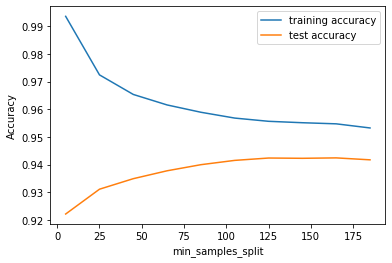

In [89]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf=50 seems to be optimal.

In [91]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_svc, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [92]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9477746591820368


In [93]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=125, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [95]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_svc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [96]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.95088868101029
